<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [43]:
from typing import List
import requests, json
import pandas as pd


# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """

#  https://api.open-meteo.com/v1/forecast?latitude=51.5085&longitude=-0.1257&daily=temperature_2m_max,temperature_2m_min&timezone=GMT&start_date=1954-12-31&end_date=1950-01-01

    endpoint = r"https://archive-api.open-meteo.com/v1/archive?"
    daily = ",".join(features)
    # input_features_names =["latitude", "longitude", "daily", "timezone", "start_date", "end_date"]
    # input_features = [latitude, longitude, daily, "GMT", start_date, end_date]
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "daily": daily,
        "timezone": "GMT",
        "start_date": start_date,
        "end_date": end_date
    }
    # url = endpoint + "&".join([input_features_names[i] + "=" + str(input_features[i]) for i in range(len(input_features))])
    res = requests.get(endpoint, params=params)

    return res.json()
    


    # add your code here

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [86]:
# add your code here
res = acquire_data(51.50,-0.12,"1950-01-01","1954-12-31",["temperature_2m_max","temperature_2m_min", "temperature_2m_mean", "precipitation_sum"])
# print(res)
df = pd.DataFrame(res["daily"])
df

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum
0,1950-01-01,4.0,-1.6,1.2,0.0
1,1950-01-02,10.5,-0.2,6.8,0.0
2,1950-01-03,11.3,10.1,10.6,0.8
3,1950-01-04,10.6,8.1,9.3,0.0
4,1950-01-05,9.6,5.7,8.2,2.9
...,...,...,...,...,...
1821,1954-12-27,9.3,5.4,7.1,0.0
1822,1954-12-28,9.0,4.7,6.9,0.0
1823,1954-12-29,8.7,6.3,7.3,0.0
1824,1954-12-30,7.8,5.2,6.3,0.0


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


[]

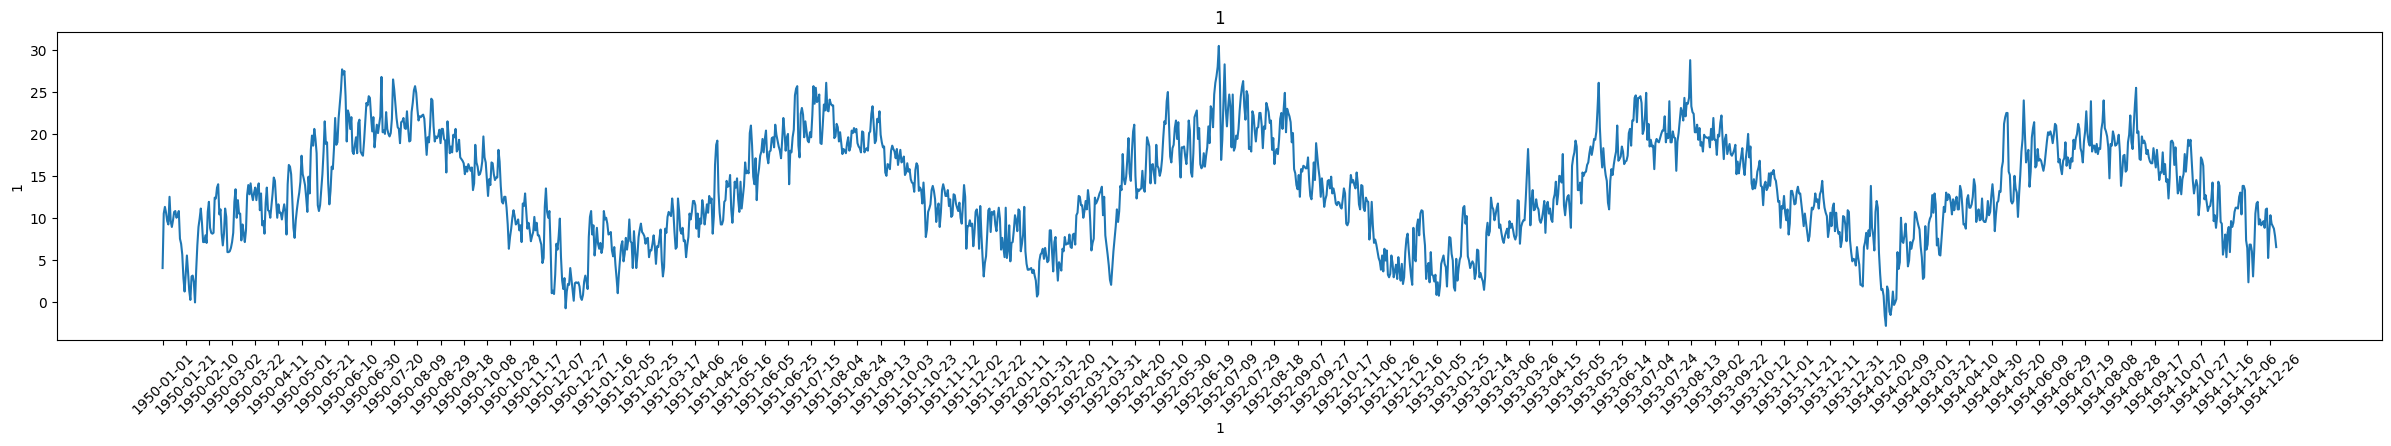

In [56]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    fig = plt.figure(figsize=(30,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20], x[::20], rotation = 45)
    return fig, ax
    # plt.plot()

    # add your code here

fig, ax = lineplot(df["time"], df["temperature_2m_max"], "1", "1", "1")
plt.plot()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

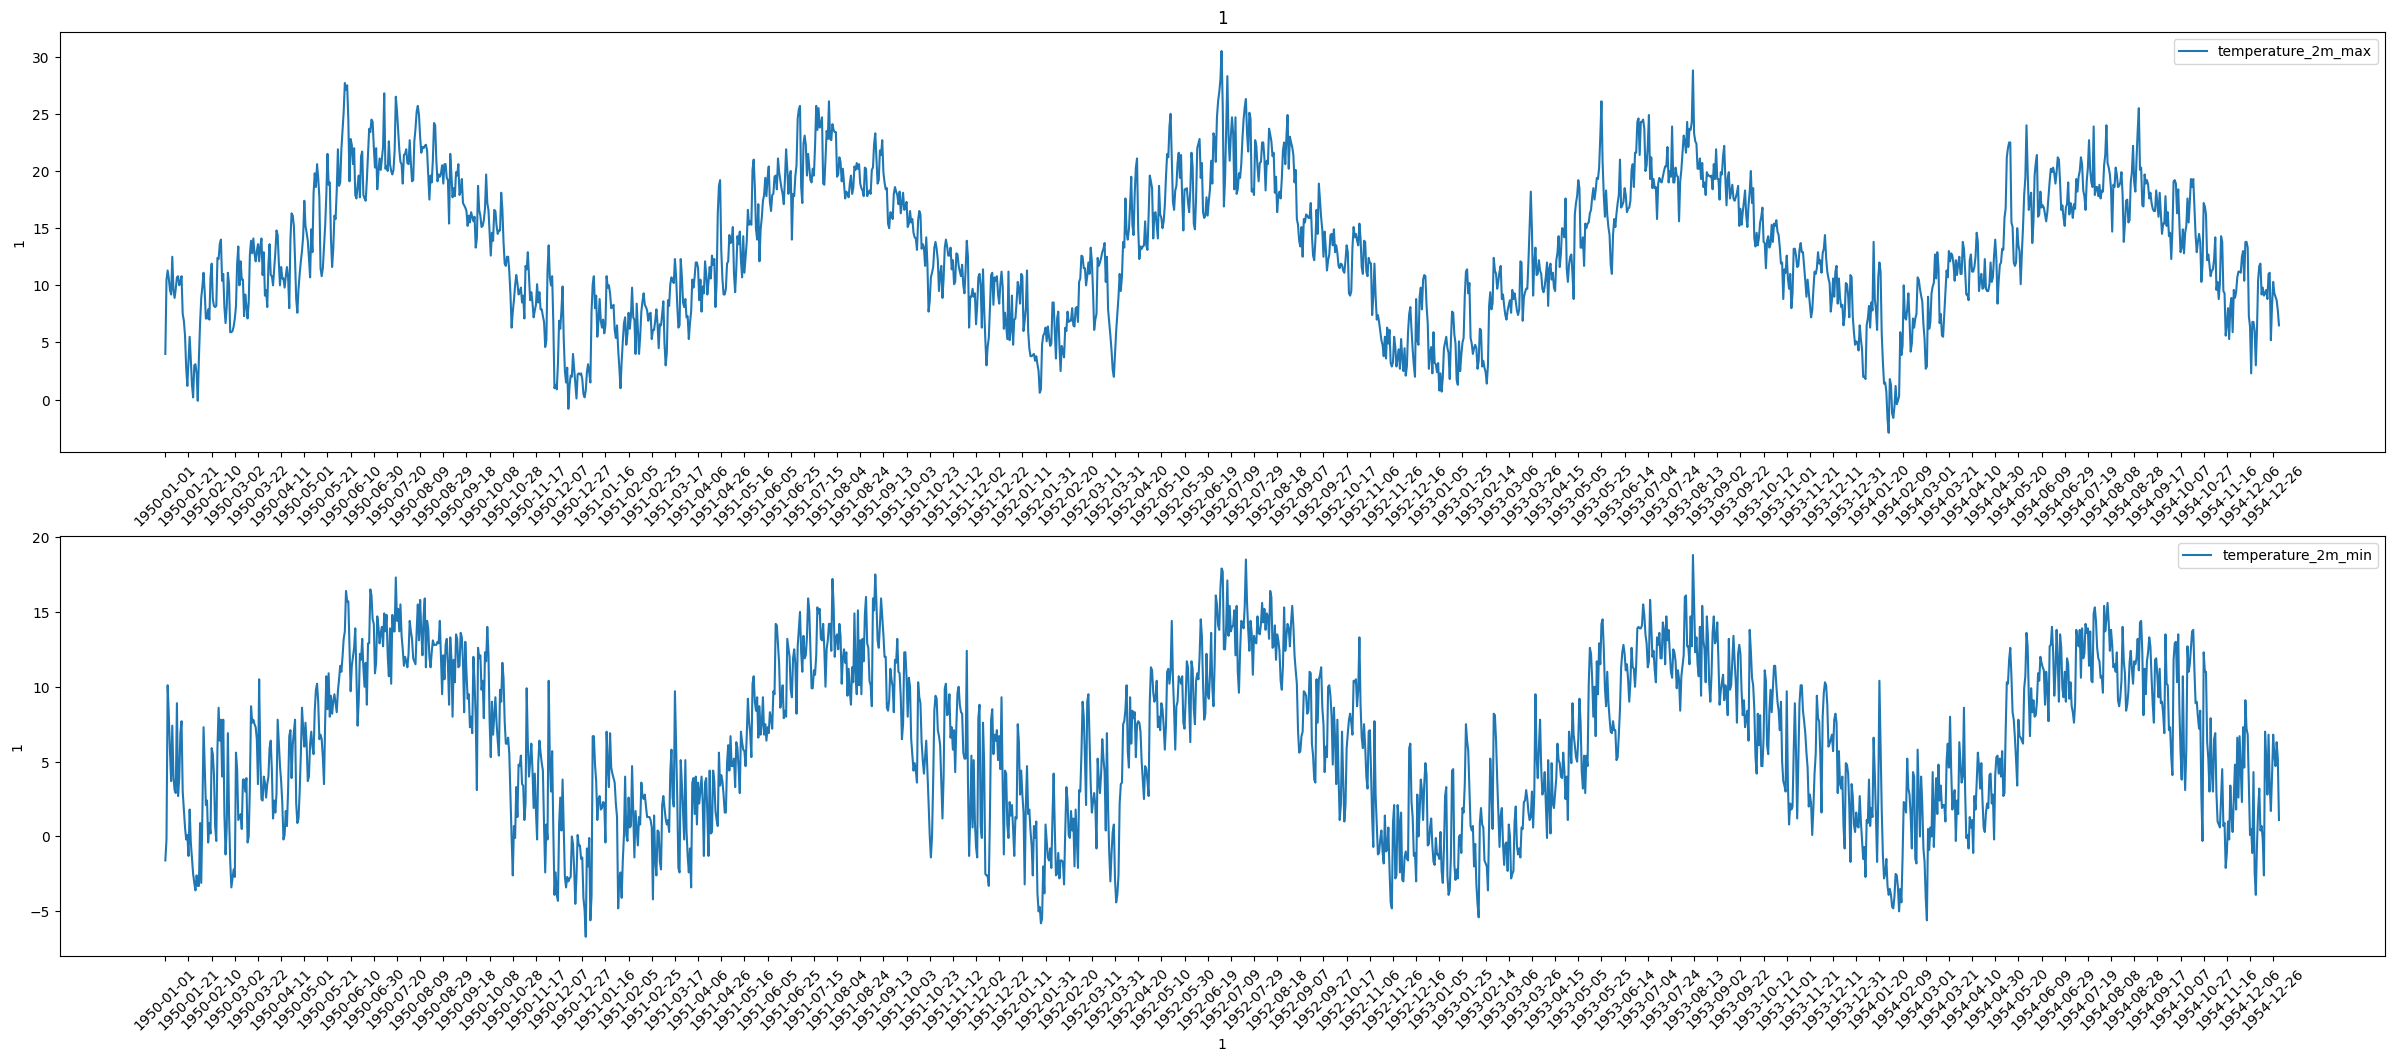

In [70]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    n_y = len(ys)
    fig, axs = plt.subplots(n_y, 1, figsize=(30, 6 * n_y))
    for i in range(n_y):
        ax = axs[i]
        ax.plot(x, ys[i], label=legend[i])
        ax.legend(loc='upper right')
        ax.set_ylabel(y_label)
        ax.set_xticks(x[::20], x[::20], rotation = 45)

    axs[0].set_title(title)
    axs[-1].set_xlabel(x_label)
  
    return fig, axs

x = df["time"]
ys = [df["temperature_2m_max"], df["temperature_2m_min"]]
title = "1"
x_label = "1"
y_label = "1"
legend = ["temperature_2m_max", "temperature_2m_min"]

fig,ax = lineplots(x, ys, title, x_label, y_label, legend)
plt.show()
    # add your code here

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


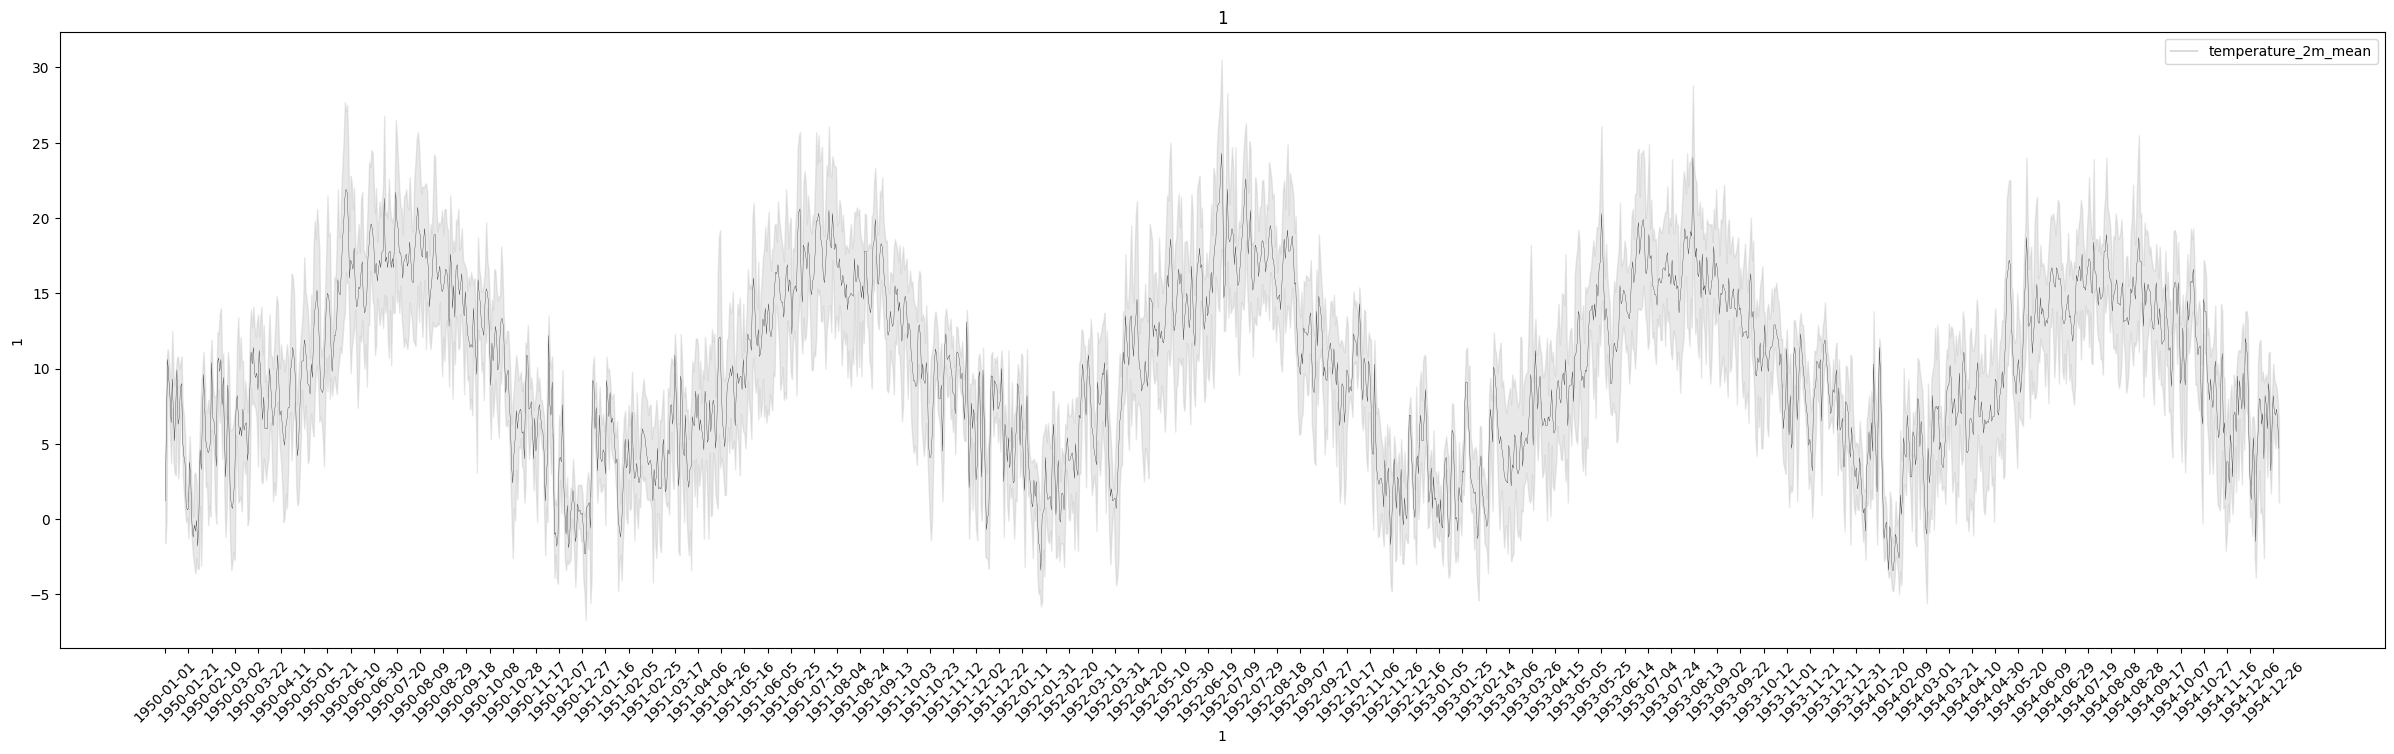

In [79]:
# add your code here

def shaded_area_plot(x: ArrayLike, min_y: ArrayLike, mean_y: ArrayLike, max_y: ArrayLike, title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    fig, ax = plt.subplots(figsize=(30,8))
    # ax.plot(x, min_y, label=legend[0])
    ax.plot(x, mean_y, label=legend[1], linewidth=0.2, c='k')
    # ax.plot(x, max_y, label=legend[2])
    ax.legend(loc='upper right')
    ax.fill_between(x, min_y, max_y, color='0.7', alpha=0.3)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x[::20], x[::20], rotation = 45)

    return fig, ax

x = df["time"]
min_y = df['temperature_2m_min']
mean_y = df['temperature_2m_mean']
max_y = df['temperature_2m_max']
title = '1'
x_label = '1'
y_label = '1'
legend = ['temperature_2m_min', 'temperature_2m_mean', 'temperature_2m_max']

shaded_area_plot(x, min_y, mean_y, max_y, title, x_label, y_label, legend)
plt.show()




<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [87]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here

    _min, _max = min(x), max(x)
    norm_x = x.copy()
    for i in range(len(x)):
        norm_x[i] = (x[i] - _min)/(_max - _min)

    return norm_x


temperature_2m_mean_norm = minmax_norm(df['temperature_2m_mean'])
print(df['temperature_2m_mean'])
print(temperature_2m_mean_norm)

0        1.2
1        6.8
2       10.6
3        9.3
4        8.2
        ... 
1821     7.1
1822     6.9
1823     7.3
1824     6.3
1825     4.7
Name: temperature_2m_mean, Length: 1826, dtype: float64
0       0.166065
1       0.368231
2       0.505415
3       0.458484
4       0.418773
          ...   
1821    0.379061
1822    0.371841
1823    0.386282
1824    0.350181
1825    0.292419
Name: temperature_2m_mean, Length: 1826, dtype: float64


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [88]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    _mean = np.mean(x)
    _std = np.std(x)
    norm_x = x.copy()
    for i in range(len(x)):
        norm_x[i] = (x[i] - _mean)/_std
    return norm_x

temperature_2m_mean_norm = zscore_norm(df['temperature_2m_mean'])
print(df['temperature_2m_mean'])
print(temperature_2m_mean_norm)

0        1.2
1        6.8
2       10.6
3        9.3
4        8.2
        ... 
1821     7.1
1822     6.9
1823     7.3
1824     6.3
1825     4.7
Name: temperature_2m_mean, Length: 1826, dtype: float64
0      -1.574418
1      -0.565173
2       0.119671
3      -0.114618
4      -0.312862
          ...   
1821   -0.511107
1822   -0.547151
1823   -0.475062
1824   -0.655284
1825   -0.943640
Name: temperature_2m_mean, Length: 1826, dtype: float64


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [98]:
def zscore_outliers(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    zscore_norm_x = zscore_norm(x)
    outliers_indices = []
    for i in range(len(zscore_norm_x)):
        if abs(zscore_norm_x[i]) > threshold:
            outliers_indices.append(i)
    
    return outliers_indices

print(zscore_outliers(df['temperature_2m_mean']))
    

[]


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

In [11]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


In [12]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


In [13]:
def zscore_clamp(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


In [14]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=3, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here